In [1]:
import timeit

import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from toolsets.file_io import get_file_list
from toolsets.ff_droup import process_mzml, get_EIC_list, EIC, feature_finding, get_mz_bin, get_peaks, get_edges, find_most_close, connect_peaks, moving_average, get_centroid, get_feature, get_ms1_feature, get_istd_info, get_istd_info_all
from toolsets.search import string_search, quick_search_values, quick_search_sorted
from skimage.restoration import denoise_wavelet
import seaborn as sns
import matplotlib.pyplot as plt
from pybaselines import utils
import pybaselines
import toolsets.spectra_operations as so
# eic_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom/EICs_snip_baseline_estimate'
from tqdm import tqdm
mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom/HILIC pos mode mzml'
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom'
file_list = get_file_list(mzml_dir, '.mzML', with_tail=False)
pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom/HILIC pos mode mzml_pl'
from toolsets.file_io import prepare_sample_list

import time

In [2]:
istd_info = pd.read_csv(os.path.join(master_dir, 'CORE_posHILIC_mzrt_5minMtd_correctionSheet.csv'))

In [3]:
file_list = get_file_list(pl_dir, 'csv', with_tail=False)

In [70]:
from toolsets.spectra_plotter import head_to_tail_plot

In [375]:
start = time.time()
features_all = feature_finding(ms1, ms2)
end = time.time()
print(end-start)

19.87297797203064


In [350]:
istd_info

,Common Name,pmz,rt_suggested
0,1_CUDA iSTD [M+H]+_HPTJABJPZMULFH-UHFFFAOYSA-N,341.279900,0.257659
1,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,236.147825,0.259421
2,1_D7-Acetaminophen iSTD [M+H]+,155.090000,0.270634
3,1_D3-Cotinine iSTD [M+H]+,180.121625,0.284845
4,1_D4-Thymine iSTD [M+H]+,131.075825,0.337992
5,1_D2-Biotin iSTD [M+H]+,247.108525,0.707642
6,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,117.085000,0.901075
7,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,113.163500,1.031961
8,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,85.132200,1.155154
9,1_D4-Taurochenodeoxycholic acid iSTD [M+H]+,504.329700,1.246398


In [382]:
pmz = 158.108000
quick_search_values(ms2, 'precursor_mz', pmz-0.05,pmz+0.05)

,scan_idx,cycle,ms_level,precursor_mz,charge,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
831,1517,505,2,158.061661,1,2.148961,68.04658508300781\t2448.2861328125\n74.7600250...,"(157.561660766602, 158.561660766602)",158.061676,2.145463,2908761.250,0.741809,0.000015,Schebesta0859_MX741718_posBA_apbDXM9P3-672,Schebesta0859_MX741718_posBA_apbDXM9P3-672.mzML
832,1310,436,2,158.108597,1,1.862853,60.074859619140625\t45552.7578125\n61.08090972...,"(157.608596801758, 158.608596801758)",158.108719,1.859350,666935.375,0.536884,0.000122,Schebesta0859_MX741718_posBA_apbDXM9P3-672,Schebesta0859_MX741718_posBA_apbDXM9P3-672.mzML
833,1280,426,2,158.108719,1,1.819503,60.07196044921875\t5502.70556640625\n60.074836...,"(157.60871887207, 158.60871887207)",158.108749,1.816188,4279497.000,0.844053,0.000031,Schebesta0859_MX741718_posBA_apbDXM9P3-672,Schebesta0859_MX741718_posBA_apbDXM9P3-672.mzML


In [393]:
features_all.columns

Index(['ms_level', 'precursor_mz', 'charge', 'rt', 'mix', 'base_name',
       'rt_offset', 'rt_start', 'rt_end', 'peak_apex_intensity', 'msms',
       'wa_msms', 'snr', 'peak_range_idx', 'ms2_range_idx', 'pmz_bin'],
      dtype='object')

In [395]:
pmz_found = []
pmz_offset = []
rt_found = []
rt_offset =[]

for index, row in istd_info.iterrows():
    istd_feature = quick_search_values(features_all, 'precursor_mz', row['pmz']-0.05, row['pmz']+0.05)
    istd_feature = quick_search_values(istd_feature, 'rt', row['rt_suggested']-10/60, row['rt_suggested']+10/60)
    if len(istd_feature)>0:
        istd_feature.sort_values(by = 'peak_apex_intensity', ascending=False, inplace = True)
        pmz_found.append(istd_feature.iloc[0]['precursor_mz'])
        pmz_offset.append(abs(istd_feature.iloc[0]['precursor_mz']-row['pmz']))
        rt_found.append(istd_feature.iloc[0]['rt'])
        rt_offset.append(abs(istd_feature.iloc[0]['rt']-row['rt_suggested']))
    else:
        pmz_found.append(np.NAN)
        pmz_offset.append(np.NAN)
        rt_found.append(np.NAN)
        rt_offset.append(np.NAN)
istd_info_check = istd_info.copy()
istd_info_check['pmz_found']=pmz_found
istd_info_check['pmz_offset']=pmz_offset
istd_info_check['rt_found']=rt_found
istd_info_check['rt_offset']=rt_offset

In [56]:
from toolsets.ff_droup import build_index, EIC, EIC_fast

In [58]:
istd_info

,Common Name,pmz,rt_suggested
0,1_CUDA iSTD [M+H]+_HPTJABJPZMULFH-UHFFFAOYSA-N,341.279900,0.257659
1,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,236.147825,0.259421
2,1_D7-Acetaminophen iSTD [M+H]+,155.090000,0.270634
3,1_D3-Cotinine iSTD [M+H]+,180.121625,0.284845
4,1_D4-Thymine iSTD [M+H]+,131.075825,0.337992
5,1_D2-Biotin iSTD [M+H]+,247.108525,0.707642
6,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,117.085000,0.901075
7,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,113.163500,1.031961
8,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,85.132200,1.155154
9,1_D4-Taurochenodeoxycholic acid iSTD [M+H]+,504.329700,1.246398


In [55]:
ms1, ms2 = process_mzml(mzml_path=file_list[191]+'.mzML', parent_dir=mzml_dir)

In [59]:
pmz = istd_info.iloc[0]['pmz']
mass_error = 0.05

In [60]:
start = time.time()
mass_sorted, intensity_sorted, index_sorted, rt_list=build_index(ms1)
cp1 = time.time()
intensity_list = EIC_fast(pmz, mass_error, mass_sorted, intensity_sorted, index_sorted)
cp2 = time.time()
print('time used for build index is: ', cp1-start)
print('time used for build EIC is: ', cp2-cp1)
print('time used total is: ', cp2-start)

time used for build index is:  1.365584135055542
time used for build EIC is:  0.020381927490234375
time used total is:  1.3859660625457764


In [67]:
istd_info

,Common Name,pmz,rt_suggested
0,1_CUDA iSTD [M+H]+_HPTJABJPZMULFH-UHFFFAOYSA-N,341.279900,0.257659
1,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,236.147825,0.259421
2,1_D7-Acetaminophen iSTD [M+H]+,155.090000,0.270634
3,1_D3-Cotinine iSTD [M+H]+,180.121625,0.284845
4,1_D4-Thymine iSTD [M+H]+,131.075825,0.337992
5,1_D2-Biotin iSTD [M+H]+,247.108525,0.707642
6,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,117.085000,0.901075
7,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,113.163500,1.031961
8,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,85.132200,1.155154
9,1_D4-Taurochenodeoxycholic acid iSTD [M+H]+,504.329700,1.246398


In [84]:
time_old = []
time_new = []
for index, row in tqdm(istd_info.iterrows(), total = len(istd_info)):
    c1 = time.time()
    intensity_list = EIC_fast(row['pmz'], mass_error, mass_sorted, intensity_sorted, index_sorted)
    c2 = time.time()
    time_new.append(c2-c1)
    c3 = time.time()
    tt = get_EIC_list(ms1, pmz, mass_error)
    c4 = time.time()
    time_old.append(c4-c3)


100%|██████████| 39/39 [00:14<00:00,  2.64it/s]


In [85]:
time_all = time_new+time_old

In [97]:
label = ['New_method']*39+['Old_method']*39

In [98]:
df = pd.DataFrame(zip(time_all, label), columns=['time', 'label'])

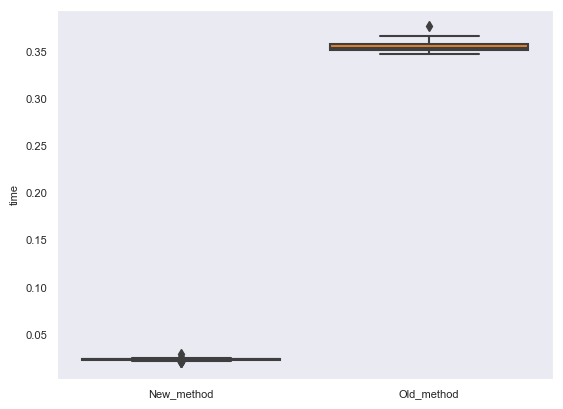

In [104]:
ax = sns.boxplot(data=df, x="label", y="time")
ax.set_xlabel('')
ax.grid(False)
plt.savefig(os.path.join(master_dir, 'EIC_comparision.png'), dpi = 300,facecolor = 'none', edgecolor = 'none')

In [61]:
start = time.time()
rt_list_old, intensity_list_old = get_EIC_list(ms1, pmz, mass_error)
end = time.time()
print(end-start)

0.3855738639831543


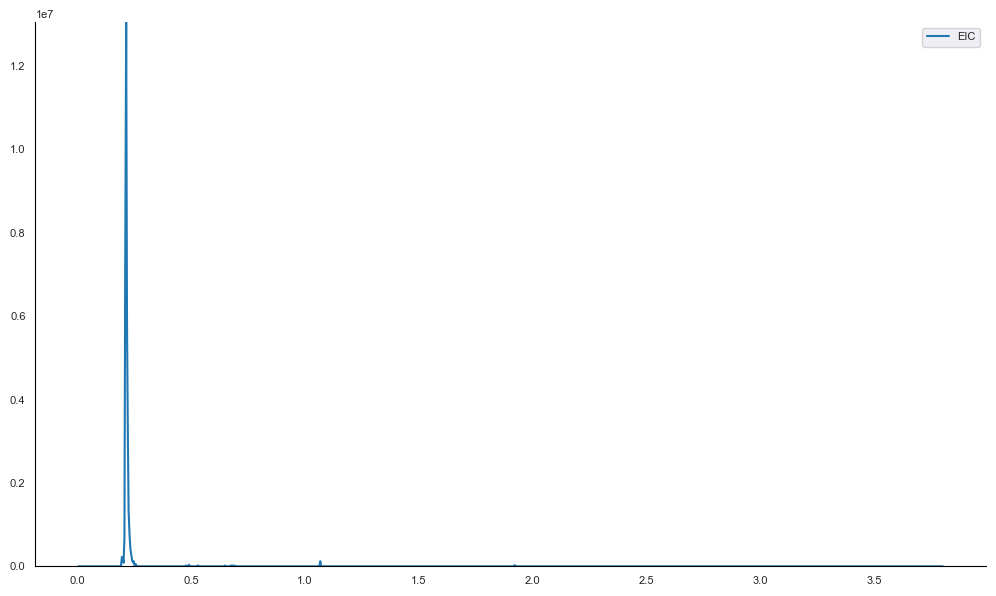

In [65]:
EIC(rt_list, intensity_list)

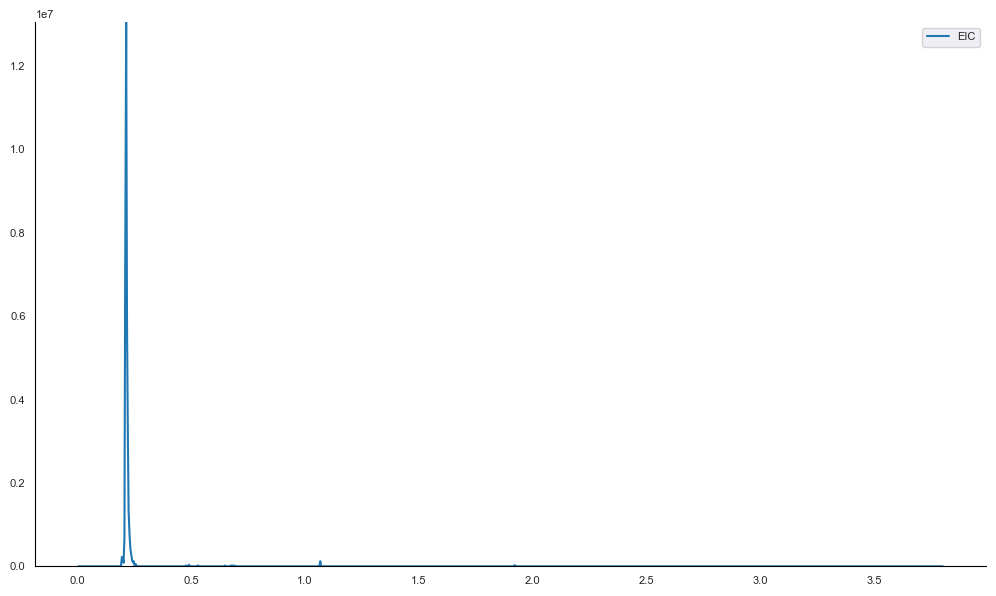

In [66]:
EIC(rt_list, intensity_list_old)

32529.919921875

In [49]:
intensity_list[idx]

32529.919921875

In [12]:
from toolsets.ff_droup import EIC_fast, EIC

In [563]:
len(np.unique(index_sorted))

866

In [54]:
start = time.time()
tt = EIC_fast(pmz, mass_error, mass_sorted, intensity_sorted, index_sorted)
# get_EIC_list(ms1, pmz, mass_error)
end = time.time()
print(end-start)

0.023495912551879883


In [19]:
sum(lst[[0,4,5]])

TypeError: list indices must be integers or slices, not list

In [14]:
start = time.time()
# tt = EIC_fast(pmz, mass_error, mass_sorted, intensity_sorted, index_sorted)
get_EIC_list(ms1, pmz, mass_error)
end = time.time()
print(end-start)

0.3583838939666748


In [16]:
0.35/0.05

6.999999999999999

In [ ]:
get_EIC_list()

In [551]:
intensity_indecies = [i for i, x in enumerate(index_range) if x == 311]

In [552]:
intensity_indecies

[0]

In [498]:
intensity_indecies = [i for i, x in enumerate(index_range) if x == idx]

In [500]:
intensity_indecies

[19]

In [501]:
intensity_sorted[19]

465590.875

In [471]:
rt_list=ms1['rt']

In [522]:
mass_error

0.05

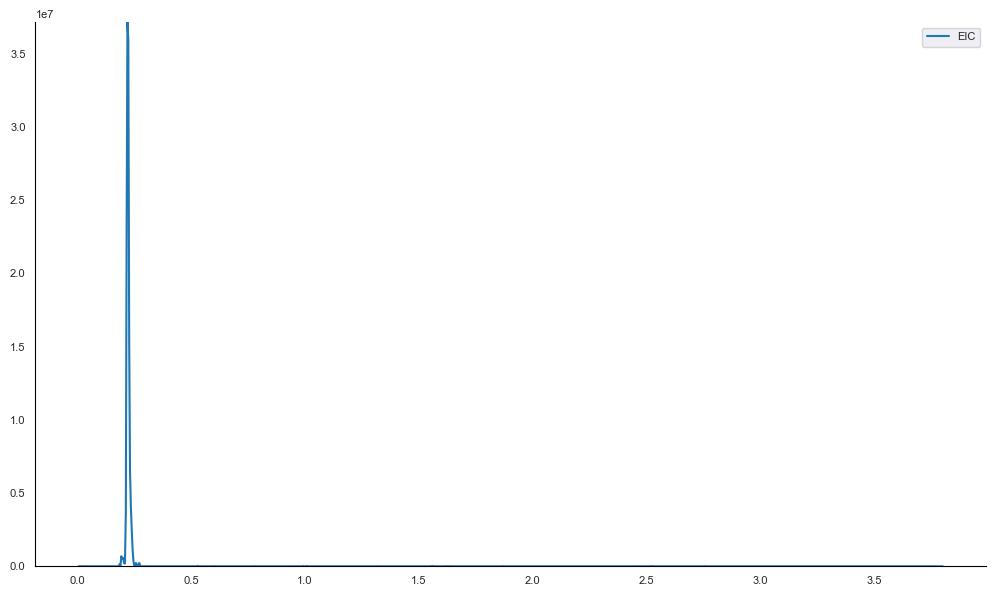

In [540]:
rt_list_old, intensity_list_old = get_EIC_list(ms1, pmz, mass_error)
EIC(rt_list_old, intensity_list_old)

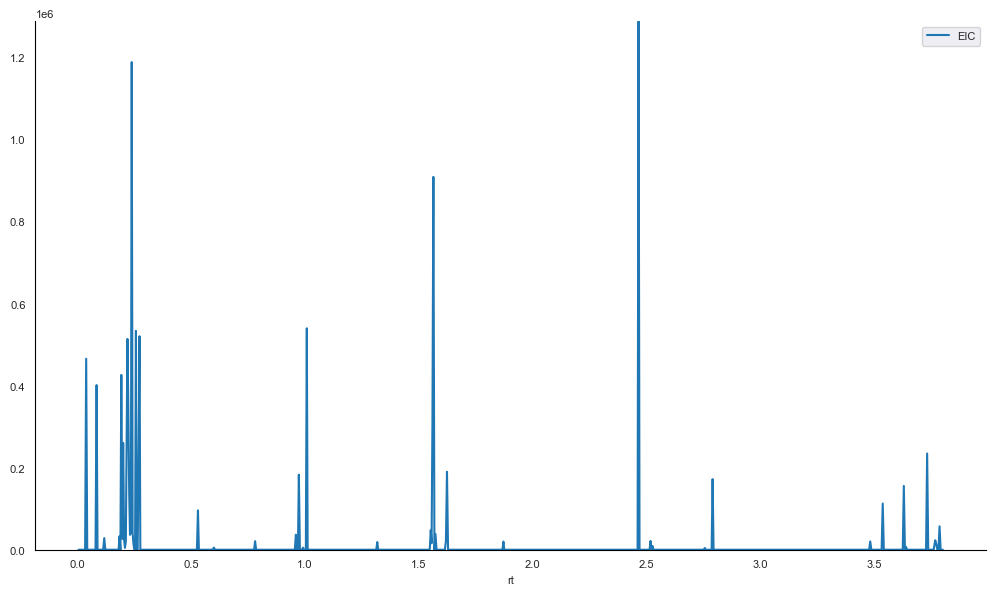

In [503]:
EIC(rt_list, intensity_list)

In [463]:
intensity_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 465590.875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 401246.875,
 0,
 0,
 0,
 0,
 0,
 0,
 28312.9296875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 32809.7578125,
 0,
 852161.78125,
 26564.08984375,
 520766.34375,
 24829.642578125,
 4490.53662109375,
 39555.212890625,
 551578.828125,
 2054692.572265625,
 691770.9189453125,
 138634.921875,
 36152.50390625,
 41667.140625,
 2376953.75,
 81064.4990234375,
 15662.939453125,
 0,
 0,
 533356.875,
 0,
 0,
 265578.4375,
 520316.46875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 95811.3671875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5132.1494140625,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [456]:
indices = [i for i, x in enumerate(index_range) if x == 48]

In [457]:
indices

[11, 39, 45, 46]

In [404]:
pmz = 270.150225
quick_search_values(features_all, 'precursor_mz', pmz-0.05, pmz+0.05)


,ms_level,precursor_mz,charge,rt,mix,base_name,rt_offset,rt_start,rt_end,peak_apex_intensity,msms,wa_msms,snr,peak_range_idx,ms2_range_idx,pmz_bin
186,2,270.149719,1,1.621691,Schebesta0859_MX741718_posBA_apbDXM9P3-672,Schebesta0859_MX741718_posBA_apbDXM9P3-672.mzML,0.009368,1.601438,1.664141,1.362319e+06,83.06055450439453\t4035.90478515625\n84.044548...,83.06055450439453\t0.010310436655861337\n84.04...,1446.214819,"[374, 378, 388]",[1135],270.149841
245,2,270.149842,1,1.522918,Schebesta0859_MX741718_posBA_apbDXM9P3-672,Schebesta0859_MX741718_posBA_apbDXM9P3-672.mzML,0.014923,1.476499,1.601438,6.602220e+07,70.21533966064453\t18197.61328125\n83.06021881...,68.17131805419922\t0.00011383552432514855\n70....,50074.381561,"[345, 356, 374]","[1057, 1084, 1111]",270.149841


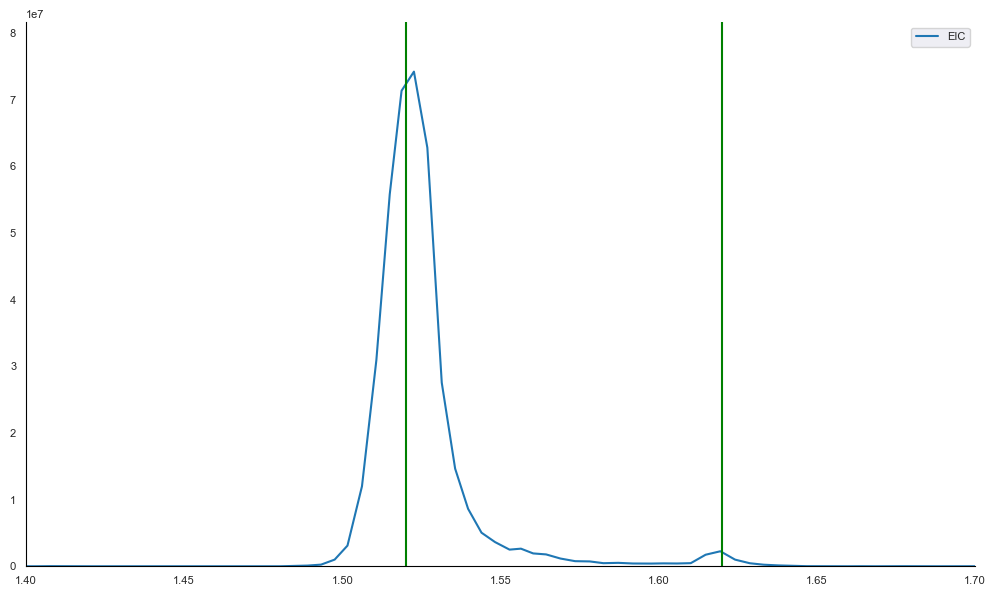

In [407]:
start = time.time()
rt_list, intensity_list = get_EIC_list(ms1, pmz, 0.05)
end = time.time()
EIC(rt_list, intensity_list,
    # vlines_location_1=[0.212313],
    vlines_location_2=[1.52, 1.62],
    rt_start=1.4, rt_end=1.7
    )

In [361]:
start = time.time()
rt_list, intensity_list = get_EIC_list(ms1, pmz, 0.05)
end = time.time()
print(end-start)

0.41251301765441895


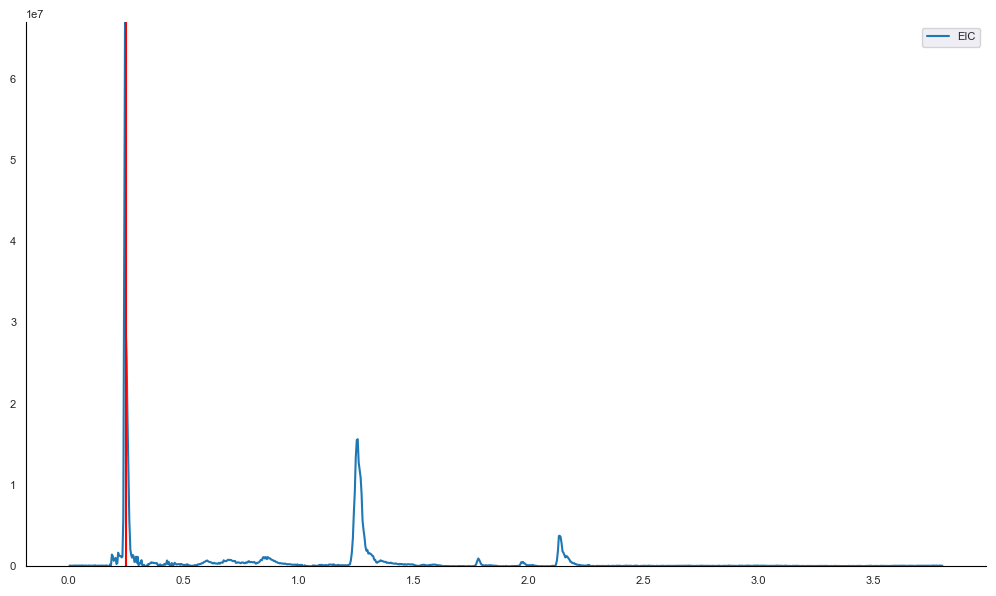

In [363]:
EIC(rt_list, intensity_list,
    vlines_location_1=[0.2506],
    # rt_start=0.3, rt_end=0.5
    )


In [337]:
mass, intensity = so.break_spectra(scan)

In [338]:
p = get_peaks(intensity_list)

In [349]:
mass_master = []
for index, row in ms1.iterrows():
    mass, intensity = so.break_spectra(row['peaks'])
    mass_master.append(mass)

In [346]:
mass[521]

196.1698455810547